# Mushroom Classification with Reduced Features
## By Christopher North

#### cnorth01@gmail.com

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

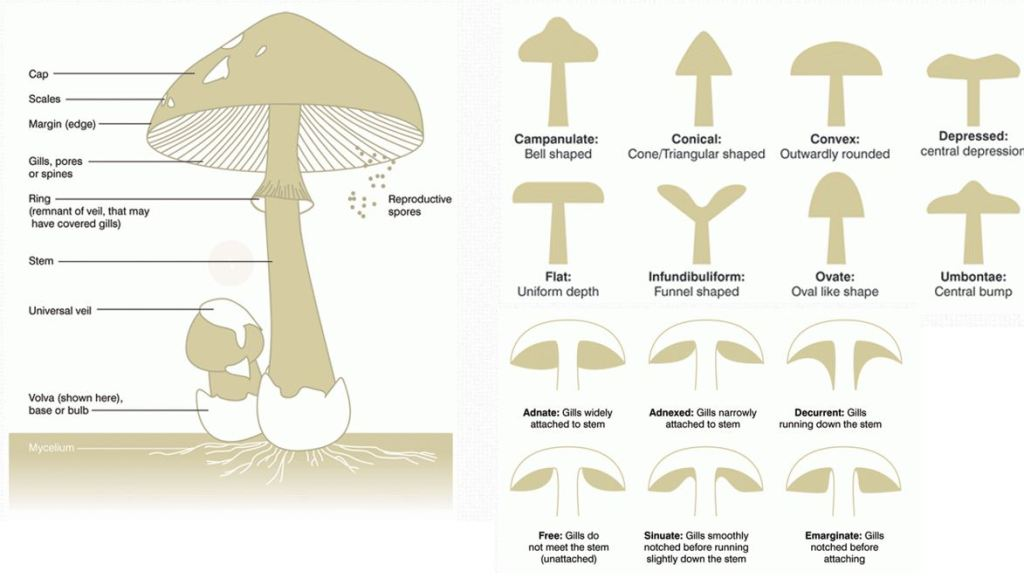

In [6]:
Image(filename='shroom_anatomy_caps.jpg') 

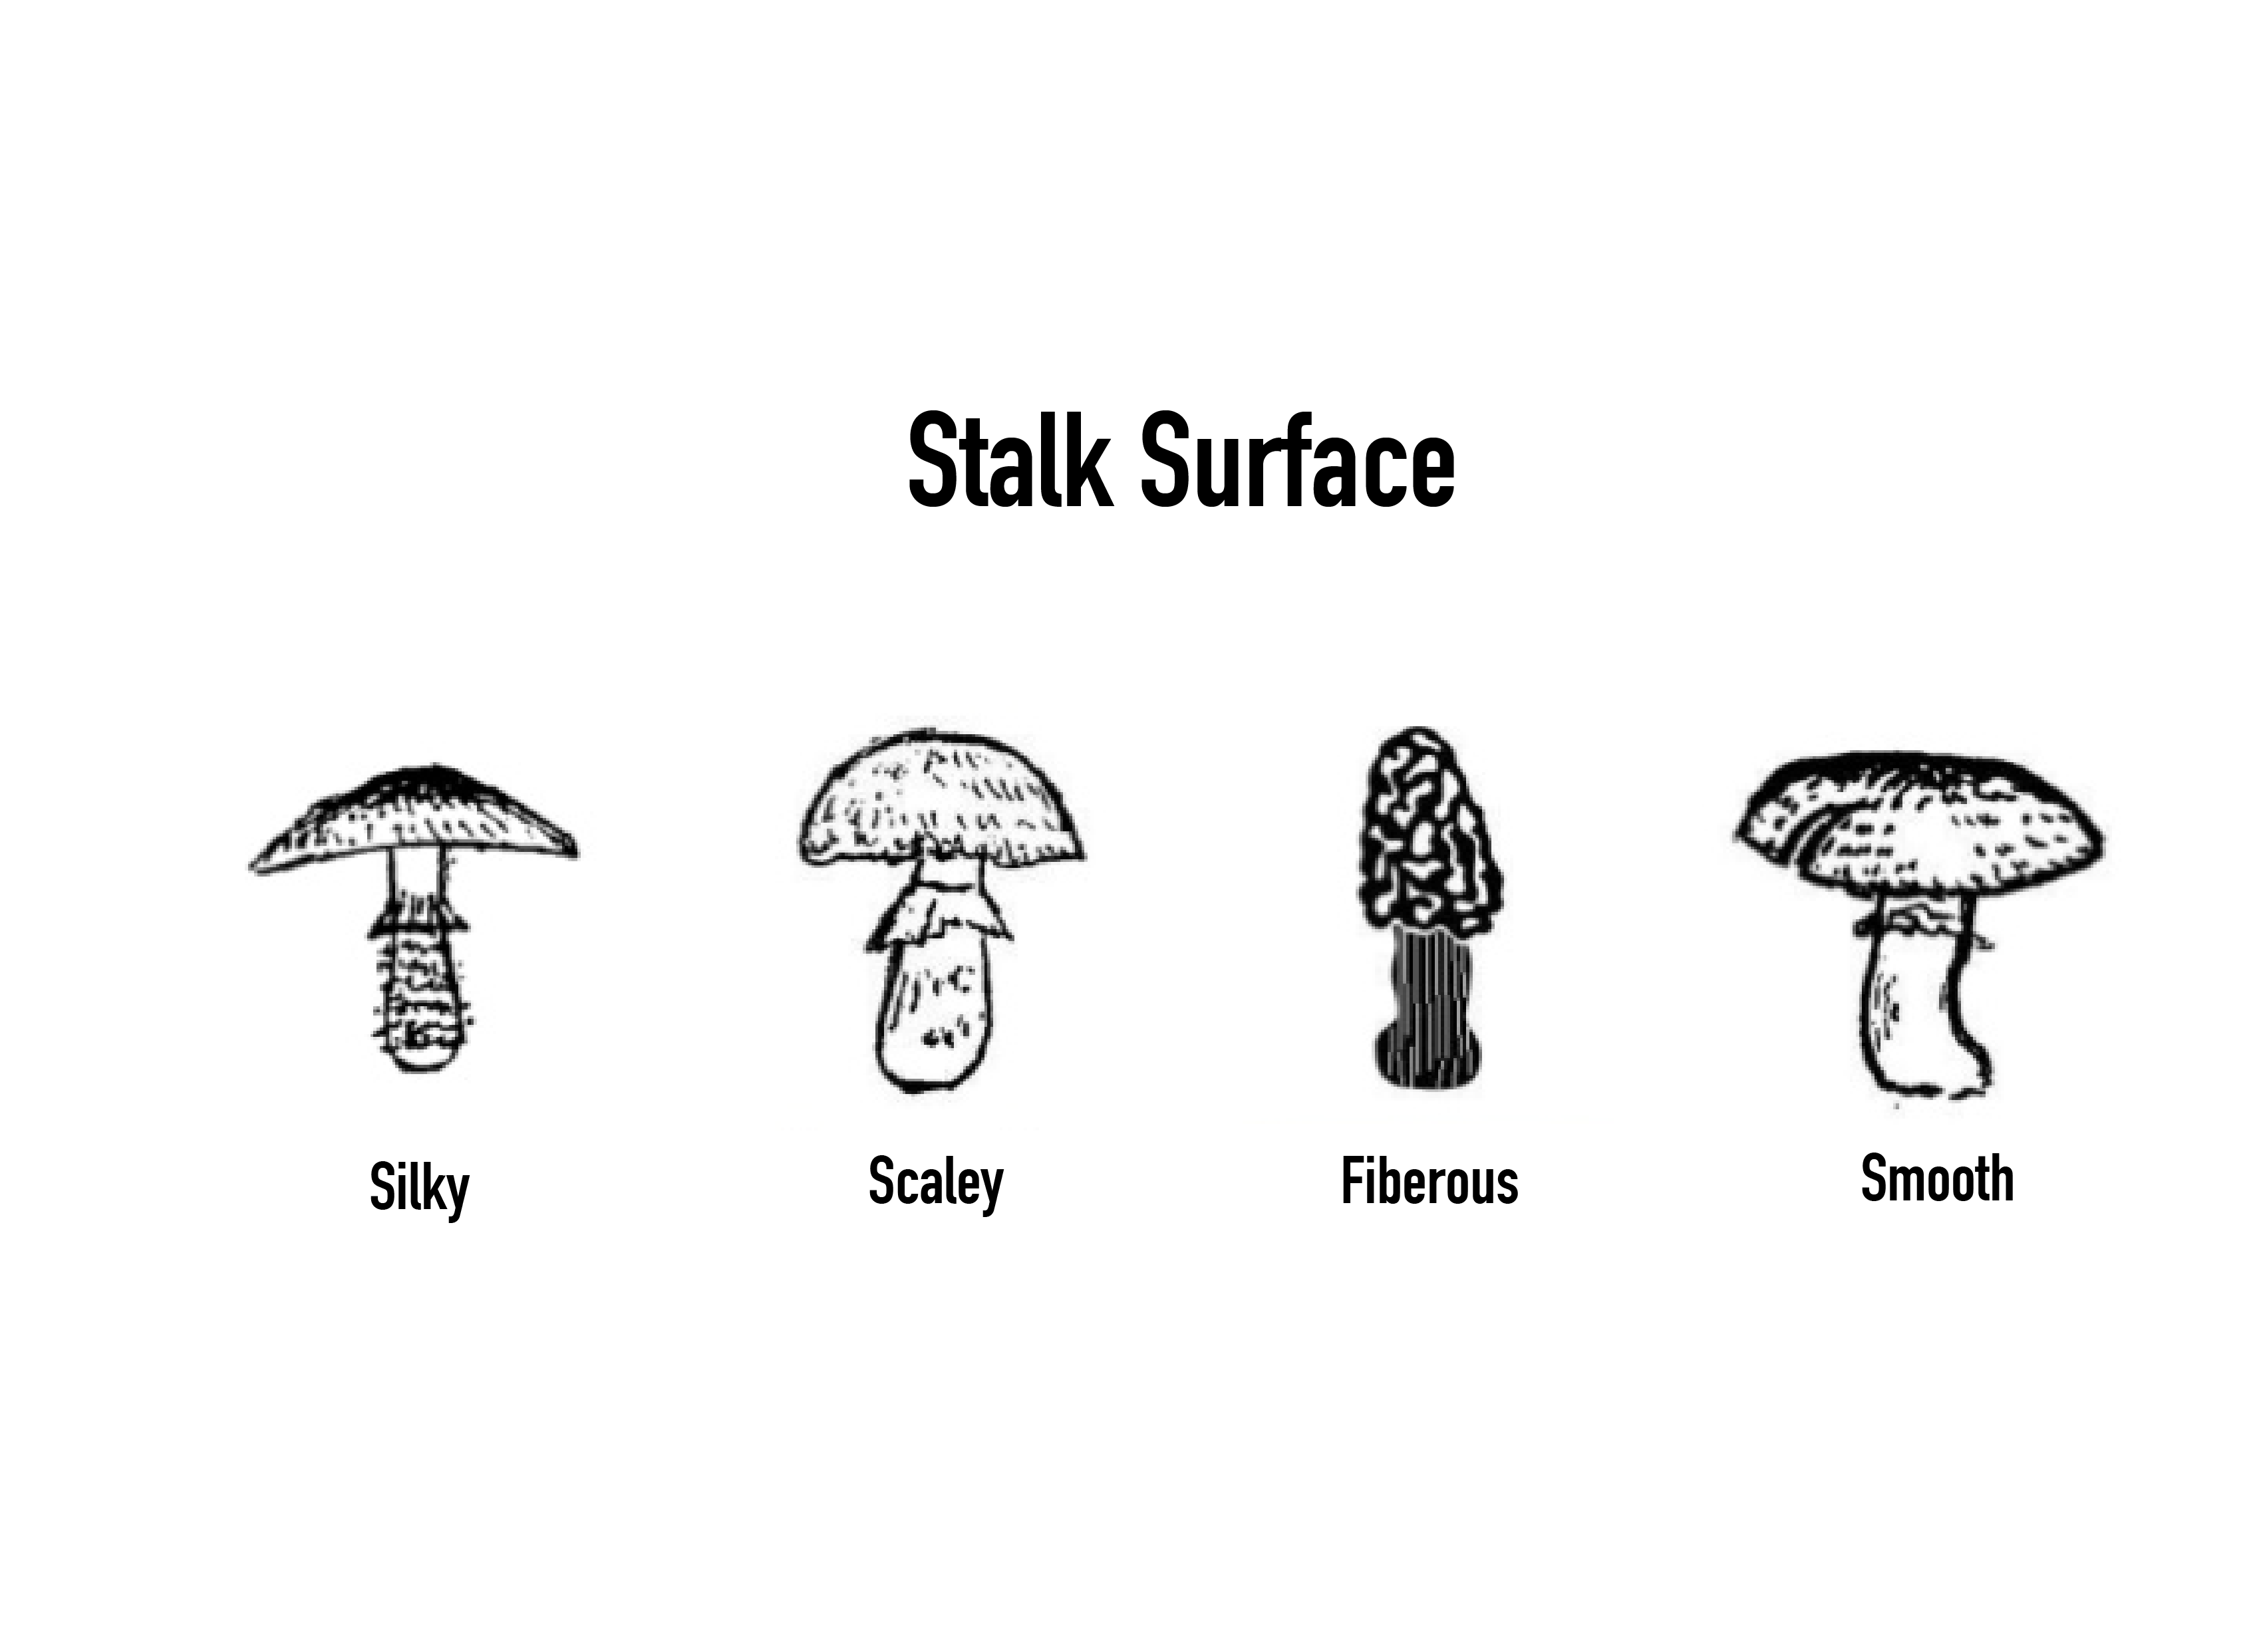

In [7]:
Image(filename='stalk_surface.png') 

**<font size="5"> Coding: </font>**

0. class: poisonous=p,edible=e
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d



**<font size="5"> Goal: </font>** Train classifiers to predict whether a mushroom is poisonous or edible. Potential models include:

* SVM
* Logistic Regression
* Naive Bayes
* Neural Network
* Decision Tree
* Random Forest
* K-Nearest Neighbor
* Spectral Clustering/K-means?

Evaluate the performance of each of these models and explain the differences between each of them. Need to convert to numerical data using dummy variables. Also use PCA to reduce dimensions and visualize.

Perfect accuracy classification is likely using all features, so identify significant features and use different models to predict classification to simulate a 'field' identification of a mushroom.

** **

In [8]:
mushrooms = pd.read_csv('mushrooms.csv')
mushrooms.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [9]:
mushrooms.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [10]:
len(mushrooms)

8124

In [11]:
mushrooms['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

The data has 22 features, 1 binary response (edible or poisonous), and 8124 samples. 4208 are edible and 3916 are poisonous. All of the data is categorical in nature. The sample is relatively balanced. Next step is Data Preparation.

## Convert from Categorical Data to One-Hot Dummy Variables
** **

In [12]:
col_names = list(mushrooms.columns)
mushrooms = pd.get_dummies(mushrooms, columns=col_names)
mushrooms.head(3)

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [13]:
#Need to have only 1 response column: 1 = poisonous, 0 = edible
mushrooms = mushrooms.drop(columns='class_e')
mushrooms = mushrooms.rename(columns={'class_p':'poisonous?'})
mushrooms.head(3)

,poisonous?,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [14]:
np.sum(mushrooms['poisonous?'])

3916

## PCA for Visualization
** **

No need to scale the data first because data is all binary after One-Hot Encoding.

In [15]:
y = mushrooms.iloc[:,1]
X = mushrooms.iloc[:,1:]


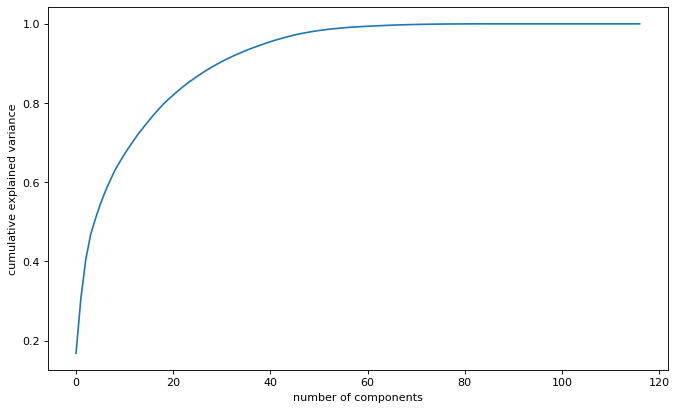

In [16]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

It appears that about 30 components can explain more than 90% of the variance in the data.

In [17]:
np.sum(pca.explained_variance_ratio_[0:31])

0.9046581254536444

Showing first two principal components for illustration purposes

In [18]:
pca = PCA(n_components=2).fit_transform(X)
pc_df = pd.DataFrame(data = pca, columns = ['principal component 1', 'principal component 2'])
pc_df.head(3)

,principal component 1,principal component 2
0,-0.996245,-0.946892
1,-1.441733,-0.164154
2,-1.524085,-0.408746


In [19]:
final_pc_df = pd.concat([pc_df, mushrooms[['poisonous?']]], axis = 1)

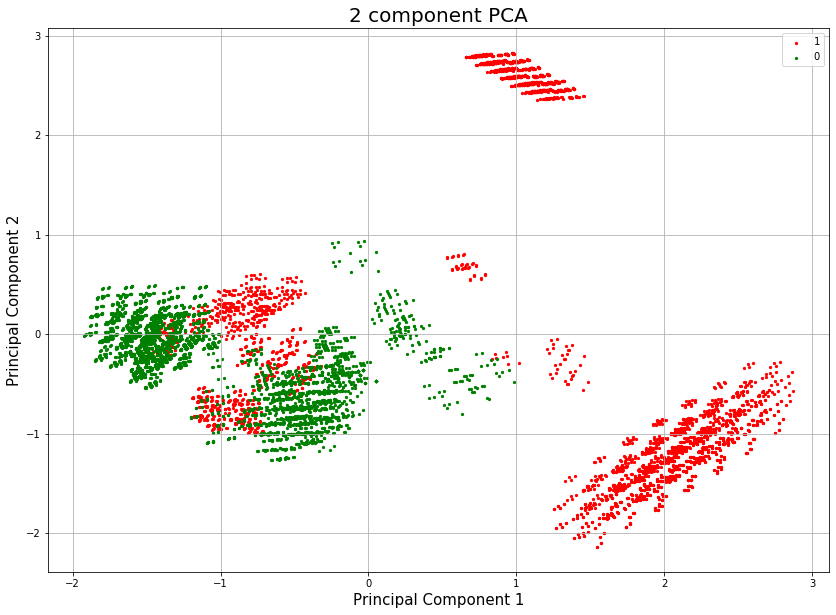

In [20]:
fig = plt.figure(figsize = (14,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_pc_df['poisonous?'] == target
    ax.scatter(final_pc_df.loc[indicesToKeep, 'principal component 1']
               , final_pc_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()


From this plot we might make a couple of inferences:

1. There are two clusters of poisonous mushrooms that are rather distinct in their characteristics from the edible ones.
2. There are poisonous mushrooms that have a profile that pretty closely resembles edible ones.

Now that we've looked at an illustration of the data, let's build some models to predict the class of the mushrooms.

## Data Split 
** **

The first step is to split the data into training and testing. The training data will be 5-fold cross-validated to tune hyperparameters, then the test data will be used as a final indicator of the model's accuracy.

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score
y = mushrooms.iloc[:,0]
X = mushrooms.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777)

In [22]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: poisonous?, dtype: uint8

First we will start with a relatively narrow range of parameters to save computing time, then change the range of values for C depending on the results.

## Support Vector Machine
** **

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = {'C': np.arange(0, 1, 0.1), 'kernel': ['linear', 'rbf']}
svm_clf = GridSearchCV(estimator=svm.SVC(), param_grid=param_grid)
svm_clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [25]:
print('Best score for SVM:', svm_clf.best_score_)
print('Best C:',svm_clf.best_estimator_.C)
print('Best Kernel:',svm_clf.best_estimator_.kernel)
print('Best Gamma:',svm_clf.best_estimator_.gamma)

Best score for SVM: 1.0
Best C: 0.4
Best Kernel: linear
Best Gamma: scale


This model achieved 100% accuracy straight away, so we won't tune the parameters any further. However, we should check and make sure the result of 100% accuracy makes sense. We can check that the predicted classes exactly match the test classes using this model.

In [26]:
svm_pred = svm.SVC(C=0.3, kernel='linear').fit(X_train, y_train).predict(X_test)
confusion_matrix(y_test, svm_pred)

array([[1253,    0],
       [   0, 1185]], dtype=int64)

In [27]:
y_test.value_counts()

0    1253
1    1185
Name: poisonous?, dtype: int64

Success!

## Logistic Regression
** **

In [28]:
from sklearn.linear_model import LogisticRegression

In [35]:
param_grid = {'C': np.arange(0.1, 1, 0.1)}
log_reg_clf = GridSearchCV(estimator=LogisticRegression(class_weight={0:1, 0:1}), param_grid=param_grid)
log_reg_clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight={0: 1},
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [36]:
print('Best score for Log_Reg:', log_reg_clf.best_score_)
print('Best C:',log_reg_clf.best_estimator_.C)

Best score for Log_Reg: 0.9996481970096746
Best C: 0.7000000000000001


This model achieved nearly perfect accuracy straight away, so we won't tune the parameters any further. However, we should check and make sure the result of 100% accuracy makes senseWe can check that the predicted classes exactly match the test classes using this model.

In [37]:
y_test.value_counts()

0    1253
1    1185
Name: poisonous?, dtype: int64

In [39]:
log_reg_pred = pd.Series(LogisticRegression(C=0.7, class_weight={0:1,0:1}).fit(X_train, y_train).predict(X_test))
confusion_matrix(y_test, log_reg_pred)

array([[1253,    0],
       [   3, 1182]], dtype=int64)

## A Note About False-Positves
** **

* upper-left (True Positives) are correctly labeled as edible
* upper-right (False Negatives) are incorrectly labeled as poisonous
* lower-left (False Positives) are incorrectly labeled as edible (VERY COSTLY ERROR)
* lower-right (true negatives) are correcty labeled as poisonous

In this log-reg model, three of the poisonous mushrooms were incorrectly labeled as edible. In this scenario, it is clearly much more costly to label a poisonous mushroom as edible, meaning we would much rather have false negatives than false positives. To reflect this, we can change the class weights in the logistic regression model to emphasize correctly labeling the poisonous mushrooms.

In [41]:
log_reg_pred = pd.Series(LogisticRegression(C=0.7, class_weight={1:10, 0:1}).fit(X_train, y_train).predict(X_test))
confusion_matrix(y_test, log_reg_pred)

array([[1253,    0],
       [   0, 1185]], dtype=int64)

And with that we've eliminated the false negatives and achieved 100% accuraccy.

## Naive Bayes
** **

In [42]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
param_grid = {'alpha': np.arange(0.01, 1, 0.01)}
NB_clf = GridSearchCV(estimator=CategoricalNB(), param_grid=param_grid)
NB_clf.fit(X_train, y_train)

#print(cross_val_score(CategoricalNB(), X_train, y_train, cv=3))
#print(np.mean(cross_val_score(CategoricalNB(), X_train, y_train, cv=3)))

GridSearchCV(cv=None, error_score=nan,
             estimator=CategoricalNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.3...
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [43]:
print('Best score for Naive Bayes:', NB_clf.best_score_)
print('Best alpha:',NB_clf.best_estimator_.alpha)

Best score for Naive Bayes: 0.9755541747236661
Best alpha: 0.01


In [44]:
NB_pred = NB_clf.predict(X_test)
confusion_matrix(y_test, NB_pred)

array([[1242,   11],
       [  52, 1133]], dtype=int64)

In [45]:
accuracy_score(y_test, NB_pred)

0.9741591468416735

In this model, we have 2 very costly false positives and 86 false negatives. Still, an admirable performance.

## Neural Network
** **

In [46]:
from sklearn.neural_network import MLPClassifier

param_grid = {'learning_rate': ['constant', 'invscaling', 'adaptive']}
nn_clf = GridSearchCV(estimator=MLPClassifier(), param_grid=param_grid)
nn_clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_gr

In [47]:
print('Best score for Neural Network:', nn_clf.best_score_)
print('Best learning_rate:',nn_clf.best_estimator_.learning_rate)

Best score for Neural Network: 0.9998240985048372
Best learning_rate: constant


In [48]:
nn_pred = nn_clf.predict(X_test)
confusion_matrix(y_test, nn_pred)

array([[1253,    0],
       [   0, 1185]], dtype=int64)

Neural Network achieved 100% accuracy, so no further tuning is needed.

## K-Nearest Neighbor
** **

In [49]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': np.arange(1, 10)}
knn_clf = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [50]:
print('Best score for KNN:', knn_clf.best_score_)
print('Best n_neighbors:', knn_clf.best_estimator_.n_neighbors)

Best score for KNN: 1.0
Best n_neighbors: 1


In [111]:
knn_pred = knn_clf.predict(X_test)
confusion_matrix(y_test, knn_pred)

array([[1253,    0],
       [   0, 1185]], dtype=int64)

## Decision Tree
** **

In [112]:
from sklearn.tree import DecisionTreeClassifier

print(cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=5))
print(np.mean(cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=5)))

[1.         1.         0.99912049 1.         1.        ]
0.9998240985048372


In [113]:
CART_clf = DecisionTreeClassifier()

CART_clf.fit(X_train, y_train)
CART_pred = CART_clf.predict(X_test)
confusion_matrix(y_test, CART_pred)

array([[1253,    0],
       [   0, 1185]], dtype=int64)

The Decision Tree achieved 100% accuracy on the test data.

## Random Forest
** **

In [114]:
from sklearn.ensemble import RandomForestClassifier

print(cross_val_score(RandomForestClassifier(), X_train, y_train, cv=5))
print(np.mean(cross_val_score(RandomForestClassifier(), X_train, y_train, cv=5)))

[1. 1. 1. 1. 1.]
1.0


In [115]:
RF_clf = RandomForestClassifier(random_state=777)

RF_clf.fit(X_train, y_train)
RF_pred = RF_clf.predict(X_test)
confusion_matrix(y_test, RF_pred)

array([[1253,    0],
       [   0, 1185]], dtype=int64)

## Feature Selection
** **
Next, the goal is to identify only a few features that can yield a high accuracy and an extremely low if not 0% false positive rate. One method to identify importance of features is using those identified in the Random Forest model.

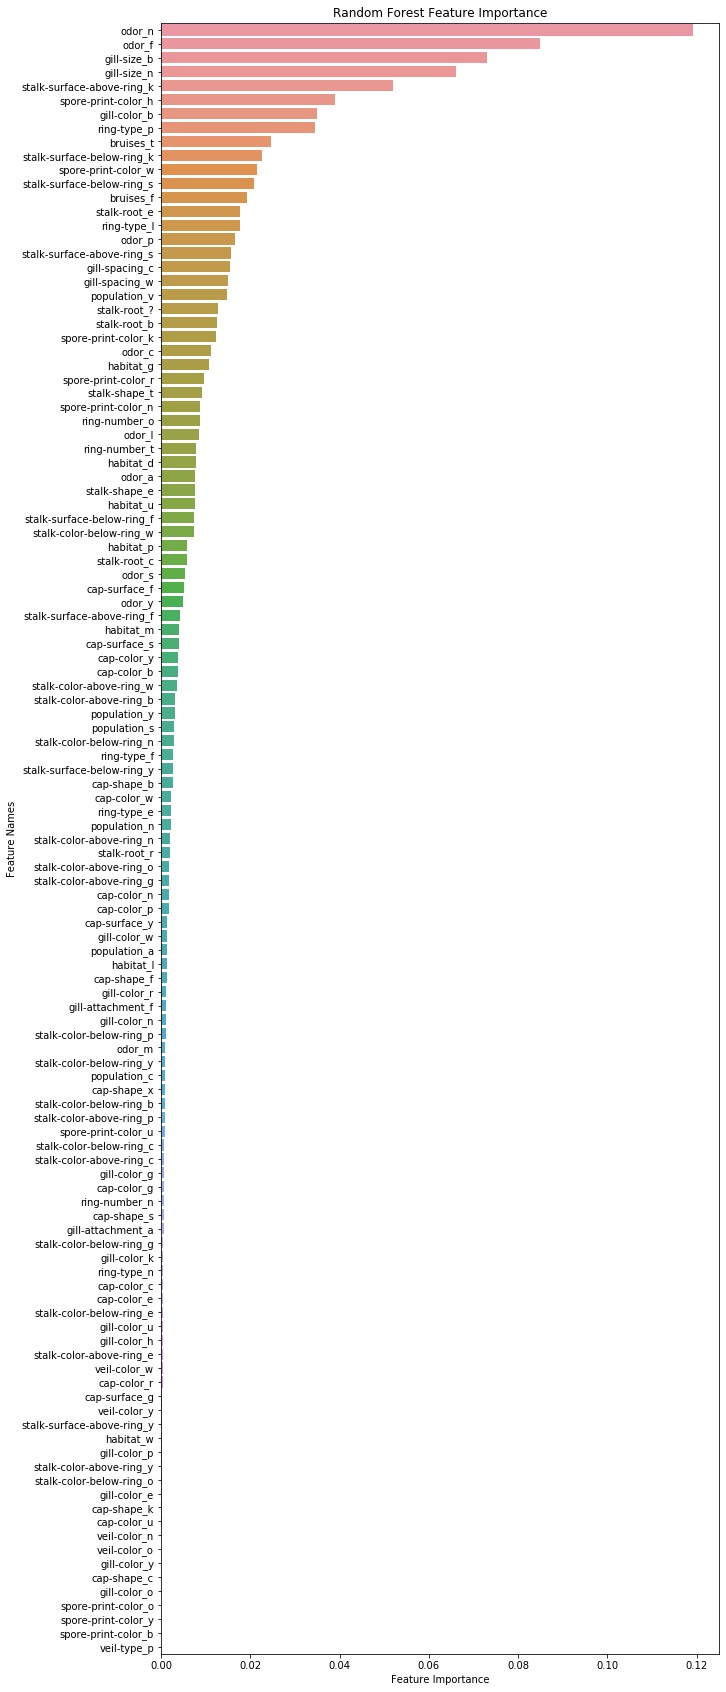

In [116]:
## SOURCE: https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html

def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,30))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')
    
plot_feature_importance(RF_clf.feature_importances_, X.columns, 'Random Forest')

Some conclusions we could make from the above plot of feature importance in the random forest classifier:

While this is highlighting certain types of variables as being important, such as 'no odor' or 'foul odor', we can re-group these individual bars back into their original categories for purposes of describing which general features are important.

For example: The top 2 features here are odor_f and odor_n, which are only 2 specific types of odors out of the 9 total possible odors. However, the sum of their significance is greater than the sum of other similarly grouped features by a large margin. Due to this, we can generally say that odor is the most important feature in the data, even though more specifically, a 'foul' or 'none' odor are the most important types of odors.

Our goal is to build a classifier based specifically on these most important attributes, but some of these are quite subjective and perhaps easily misidentified. Certain attributes which may be more difficult to identify as a novice mushroom identifier might be things like odor, stalk-root, and gill-attachment.

Below is a summary of survey results collected from students who asked participants to identify attributes of a mushroom correctly, given an example and the options to choose from.

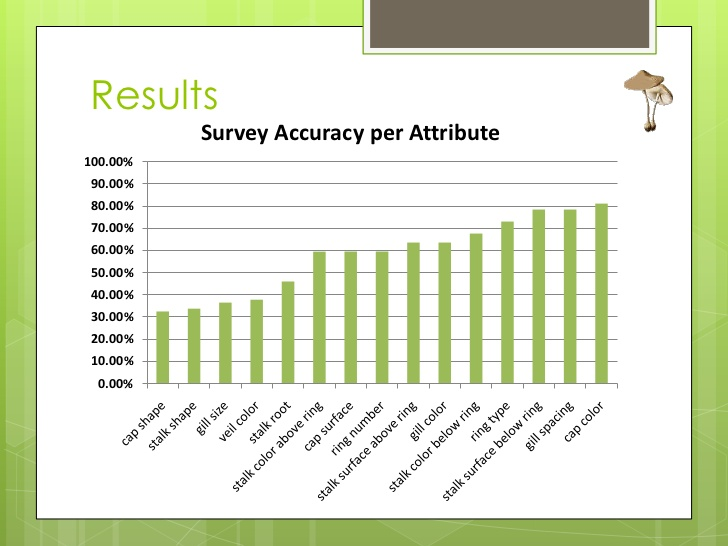

In [117]:
Image(filename='survey_accuracy.jpg') 
#source: https://pt.slideshare.net/timmenzies/project-3-mushrooms?next_slideshow=1

## A Note on Odor
** **
So the most easily identifiable attributes are cap color, gill spacing, stalk surface, ring type, and stalk color. Important to note that the odor attribute is missing. Although the values that odor can take in this data might be pretty difficult to correctly identify, one could probably differentiate between a 'bad' smell and a 'good' smell.

For example, what if we separated the 9 odors into just 2 categories, making it easier for a novice mushroom identifier to choose? This could be very advantageous to the model, considering odor_n is the most significant feature identified in the random forest model.

To illustrate:
1. "Has odor": creosote=c,fishy=y,foul=f, musty=m, pungent=p, spicy=s, almond=a, anise=l
2. "No odor": none=n


If we only used the top 3 most easily identifiable features of a mushroom to train a classifier, plus a fourth for our newly created distinction of odors, how would it perform?

In [51]:
mushrooms2 = pd.read_csv('mushrooms.csv', usecols=['class', 'cap-color', 'gill-spacing','stalk-surface-below-ring', 'odor'])
mushrooms2.head(3)

,class,cap-color,odor,gill-spacing,stalk-surface-below-ring
0,p,n,p,c,s
1,e,y,a,c,s
2,e,w,l,c,s


In [52]:
mushrooms2 = pd.get_dummies(mushrooms2)
#Need to have only 1 response column: 1 = poisonous, 0 = edible
mushrooms2 = mushrooms2.drop(columns=['class_e', 'odor_c', 'odor_y', 'odor_f', 'odor_m', 'odor_p', 'odor_s', 'odor_a', 'odor_l'])
mushrooms2 = mushrooms2.rename(columns={'class_p':'poisonous?'})
mushrooms2.head(3)

,poisonous?,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,odor_n,gill-spacing_c,gill-spacing_w,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y
0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0


In [53]:
y = mushrooms2.iloc[:,0]
X = mushrooms2.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777)

## Support Vector Machine (reduced features)

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = {'C': np.arange(0, 1, 0.1), 'kernel': ['linear', 'rbf']}
svm_clf = GridSearchCV(estimator=svm.SVC(class_weight={1:50, 0:1}), param_grid=param_grid)
svm_clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight={0: 1, 1: 50}, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [122]:
print('Best score for SVM:', svm_clf.best_score_)
print('Best C:',svm_clf.best_estimator_.C)
print('Best Kernel:',svm_clf.best_estimator_.kernel)
print('Best Gamma:',svm_clf.best_estimator_.gamma)

Best score for SVM: 0.9168126587248222
Best C: 0.4
Best Kernel: rbf
Best Gamma: scale


In [123]:
svm_clf = svm.SVC(C=0.4, kernel='rbf', gamma='scale', class_weight={1:1, 0:1}).fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
confusion_matrix(y_test, svm_pred)

array([[1253,    0],
       [ 102, 1083]], dtype=int64)

In [124]:
accuracy_score(y_test, svm_pred)

0.9581624282198523

A 96% accuracy using just the 4 most identifiable features (technically 17 after one-hot encoding). However, the incorrect classifications are false positives, which could have deadly consequences. By assigning a significantly higher weight(50x) to the poisonous class of mushrooms, we can try to completely eliminate false positives.

In [125]:
svm_clf = svm.SVC(C=0.4, kernel='rbf', gamma='scale', class_weight={1:50, 0:1}).fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
confusion_matrix(y_test, svm_pred)

array([[1032,  221],
       [   0, 1185]], dtype=int64)

In [126]:
accuracy_score(y_test, svm_pred)

0.9093519278096801

Success! A 0% false positive rate, and we've only reduced the accuracy to 91%. A small price to pay to completely avoid some serious sideaffects and possibly death.

## Logistic Regression (reduced features)

We will apply a similar class weight (x75) to the regression model to eliminate false positives

In [127]:
param_grid = {'C': np.arange(1, 10, 0.5)}
log_reg_clf = GridSearchCV(estimator=LogisticRegression(class_weight={1:75, 0:1}), param_grid=param_grid)
log_reg_clf.fit(X_train, y_train)

print('Best score for Log_Reg:', log_reg_clf.best_score_)
print('Best C:',log_reg_clf.best_estimator_.C)

Best score for Log_Reg: 0.8520946653002615
Best C: 3.5


In [128]:
log_reg_pred = pd.Series(LogisticRegression(C=3.5, class_weight={1:75, 0:1}).fit(X_train, y_train).predict(X_test))
confusion_matrix(y_test, log_reg_pred)

array([[ 882,  371],
       [   0, 1185]], dtype=int64)

In [129]:
accuracy_score(y_test, log_reg_pred)

0.8478260869565217

## Naive Bayes (reduced features)
** **

In [130]:
param_grid = {'alpha': np.arange(0.01, 1, 0.01)}
NB_clf = GridSearchCV(estimator=CategoricalNB(), param_grid=param_grid)
NB_clf.fit(X_train, y_train)

#print(cross_val_score(GaussianNB(), X_train, y_train, cv=3))
#print(np.mean(cross_val_score(GaussianNB(), X_train, y_train, cv=3)))

GridSearchCV(cv=None, error_score=nan,
             estimator=CategoricalNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.3...
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [131]:
print('Best score for Naive Bayes:', NB_clf.best_score_)
print('Best alpha:',NB_clf.best_estimator_.alpha)

NB_pred = NB_clf.predict(X_test)
confusion_matrix(y_test, NB_pred)

Best score for Naive Bayes: 0.8890279510258086
Best alpha: 0.01


array([[1130,  123],
       [ 132, 1053]], dtype=int64)

In [132]:
accuracy_score(y_test, NB_pred)

0.8954060705496308

## Neural Network (reduced features)
** **

In [133]:
from sklearn.neural_network import MLPClassifier

param_grid = {'learning_rate': ['constant', 'invscaling', 'adaptive']}
nn_clf = GridSearchCV(estimator=MLPClassifier(), param_grid=param_grid)
nn_clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_gr

In [134]:
print('Best score for Neural Network:', nn_clf.best_score_)
print('Best learning_rate:',nn_clf.best_estimator_.learning_rate)

Best score for Neural Network: 0.959198427088212
Best learning_rate: adaptive


In [135]:
nn_pred = nn_clf.predict(X_test)
confusion_matrix(y_test, nn_pred)

array([[1253,    0],
       [  97, 1088]], dtype=int64)

In [136]:
accuracy_score(y_test, nn_pred)

0.9602132895816243

## K-Nearest Neighbor (reduced features)
** **

In [137]:
param_grid = {'n_neighbors': np.arange(1, 10), 'metric':['minkowski', 'euclidean']}
knn_clf = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['minkowski', 'euclidean'],
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [138]:
print('Best score for KNN:', knn_clf.best_score_)
print('Best n_neighbors:', knn_clf.best_estimator_.n_neighbors)

Best score for KNN: 0.9584948211075611
Best n_neighbors: 6


In [139]:
knn_clf = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn_clf.fit(X_train, y_train)
knn_pred = knn_clf.predict(X_test)
confusion_matrix(y_test, knn_pred)

array([[1127,  126],
       [  13, 1172]], dtype=int64)

In [140]:
accuracy_score(y_test, knn_pred)

0.94298605414274

## Decision Tree (reduced features)

In [141]:
CART_clf = DecisionTreeClassifier(class_weight={1:50, 0:1})

CART_clf.fit(X_train, y_train)
CART_pred = CART_clf.predict(X_test)
confusion_matrix(y_test, CART_pred)

array([[1032,  221],
       [   0, 1185]], dtype=int64)

In [142]:
print(cross_val_score(DecisionTreeClassifier(class_weight={1:50, 0:1}), X_train, y_train, cv=5))
print(np.mean(cross_val_score(DecisionTreeClassifier(class_weight={1:50, 0:1}), X_train, y_train, cv=5)))

[0.92003515 0.9058927  0.93579595 0.91029024 0.91204925]
0.9168126587248222


In [143]:
accuracy_score(y_test, CART_pred)

0.9093519278096801

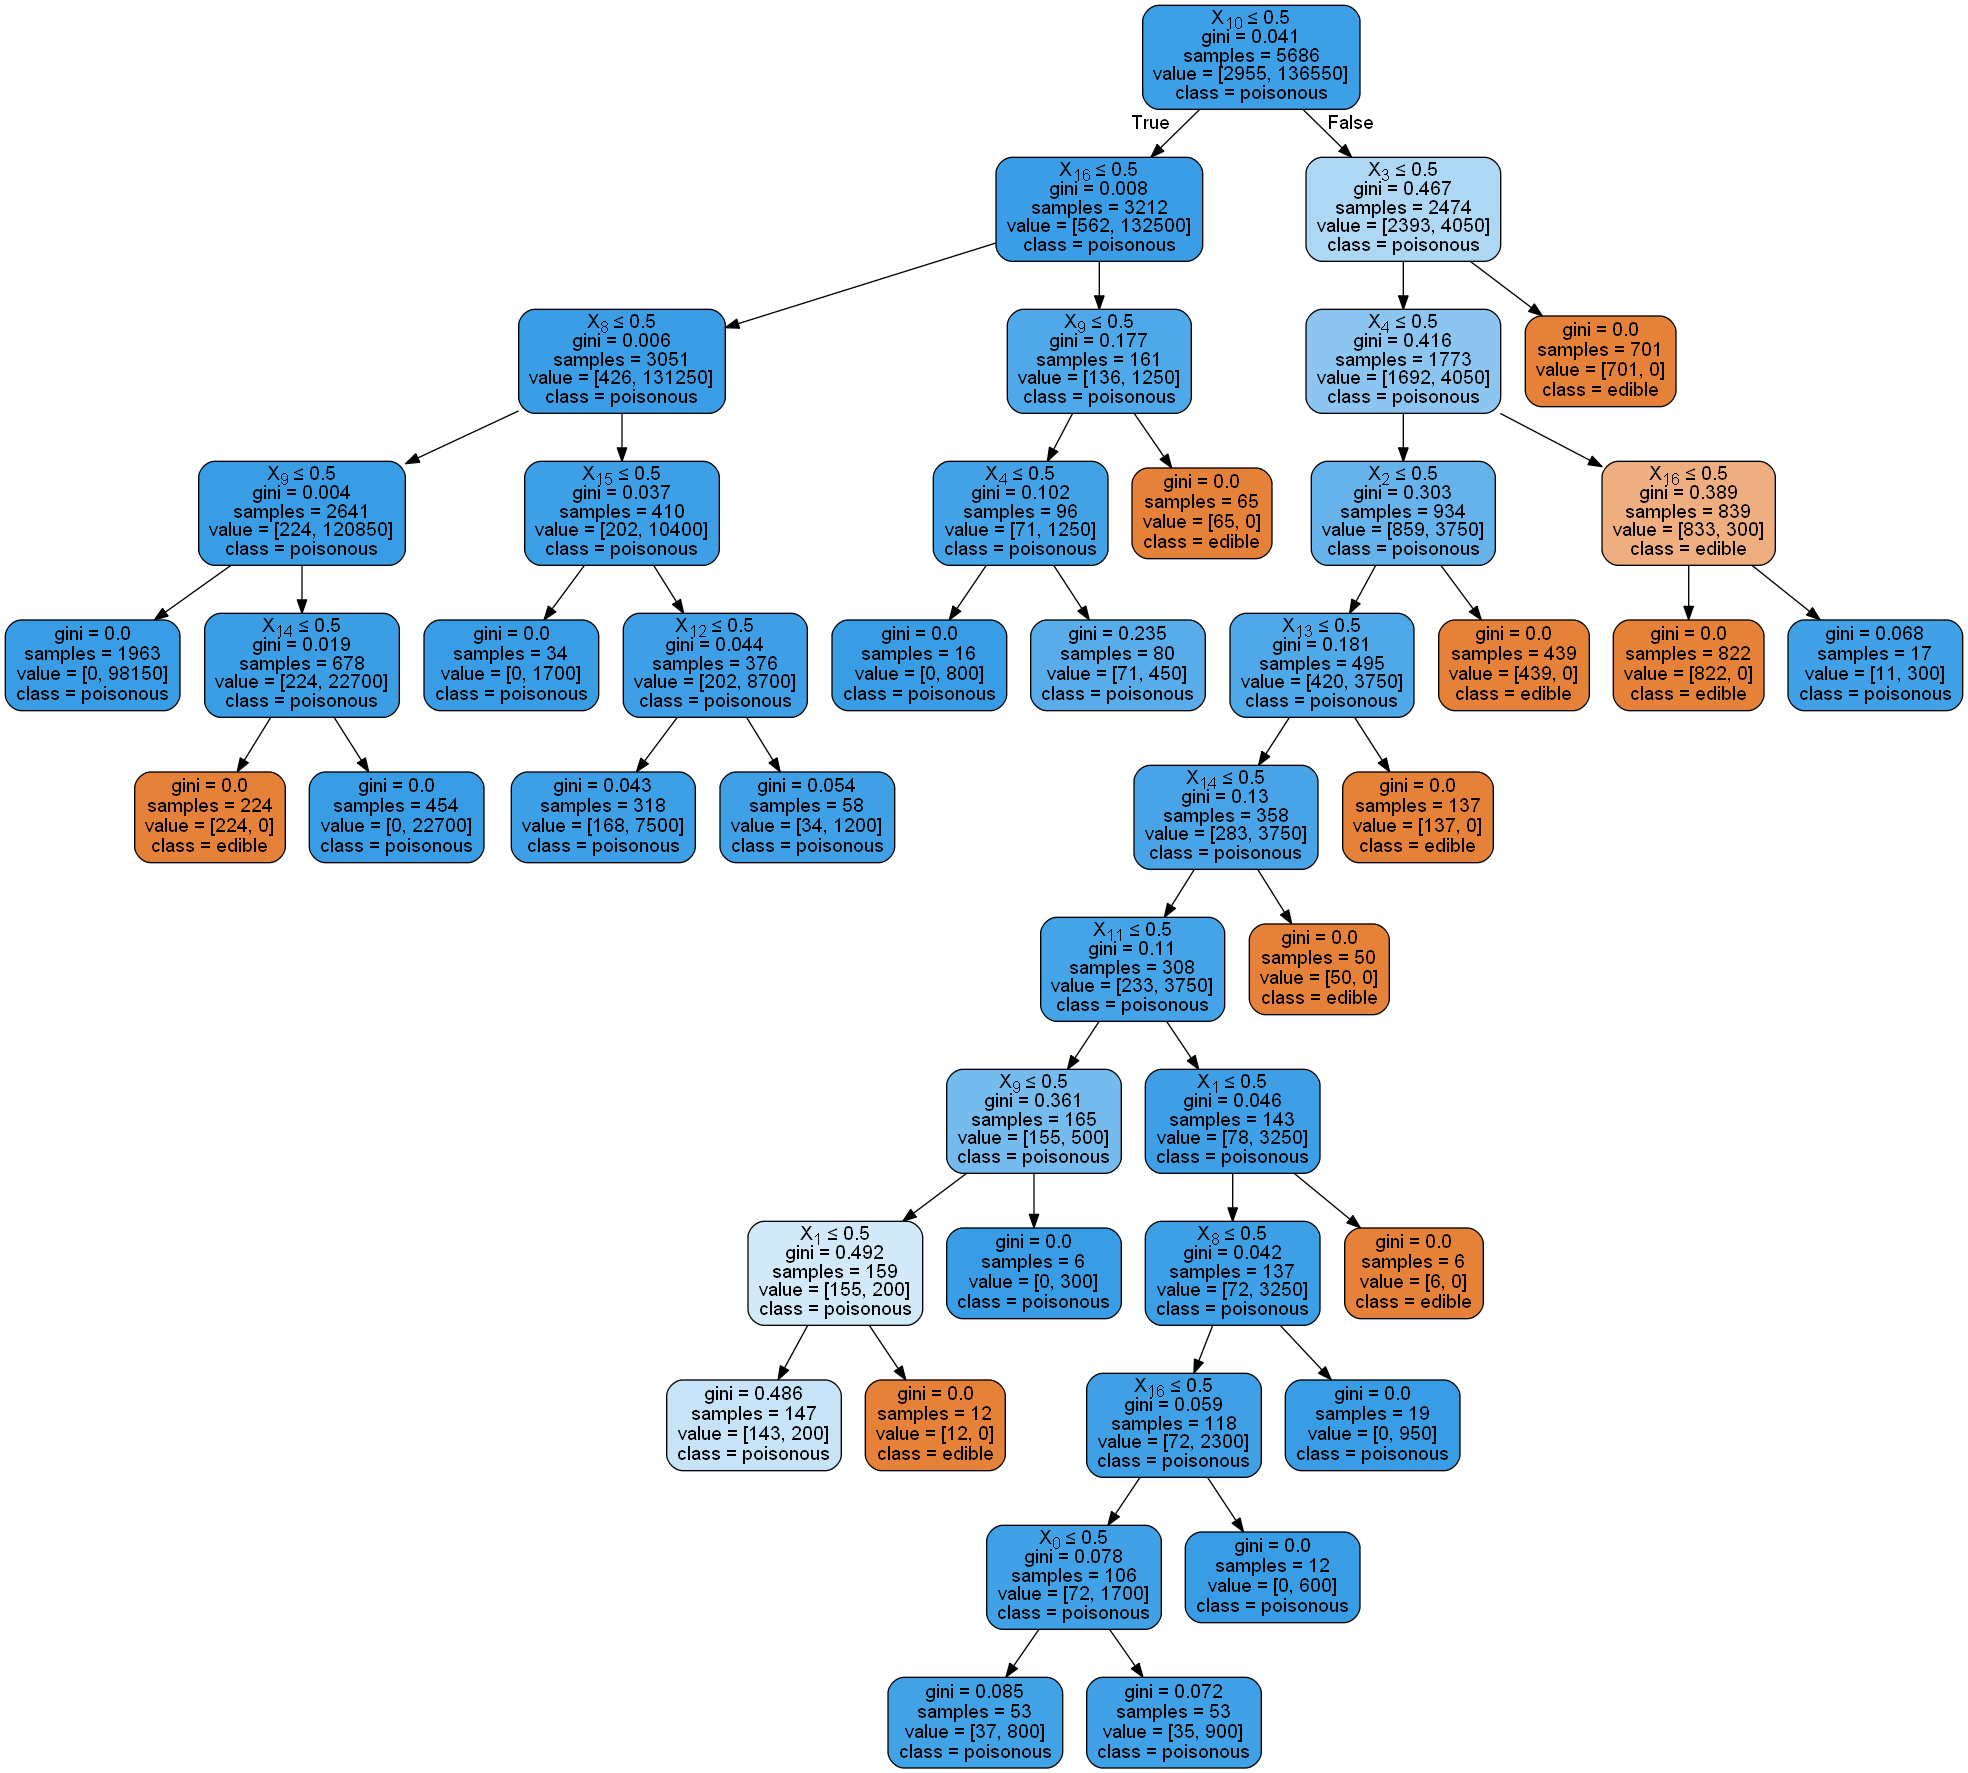

In [144]:
#Adapted from https://www.datacamp.com/community/tutorials/decision-tree-classification-python
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(CART_clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['edible','poisonous'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('cart_test.png')
Image(graph.create_png())

Success! The same performance as the SVM model. No false positives and 91% accuracy

## Random Forest (reduced features)

In [145]:
RF_clf = RandomForestClassifier(class_weight={1:50, 0:1}, random_state=777)

RF_clf.fit(X_train, y_train) 
RF_pred = RF_clf.predict(X_test)
print(cross_val_score(RF_clf, X_train, y_train, cv=5))
print(np.mean(cross_val_score(RF_clf, X_train, y_train, cv=5)))

[0.92003515 0.9058927  0.93579595 0.91029024 0.91204925]
0.9168126587248222


In [146]:
accuracy_score(y_test, CART_pred)

0.9093519278096801

In [147]:
confusion_matrix(y_test, RF_pred)

array([[1032,  221],
       [   0, 1185]], dtype=int64)

Success! Again, the same performance.

In [148]:
y_test.value_counts()

0    1253
1    1185
Name: poisonous?, dtype: int64

## Results:
** **

### K-NN and Neural Network
K-Nearest Neighbors (K-NN) and Neural Network (NN) using just 4 features still perform very well. Both achieved 96% CV accuracy and comparable accuracies on the test set. However, K-NN outperformed Neural Network in the False Positive rate, which is an important criterion of the ideal classifier. In short, K-NN will label about the same number of mushrooms correctly as Neural Network will, however, K-NN will give many fewer false positives which have high consequence, so KNN is preferred over Neural Network. While this performance is admirable, neither model meets the criterion of a 0% false positive rate. In an environment where false-positives and false-negatives are equal in cost, the Neural Network may be preferred because of the slightly better performance on the test set.

### Logistic Regression and Naïve Bayes
Logistic Regression has an accuracy of 85% and a 0% False Positive Rate which is quite good. It currently meets the important criterion of a 0% false positive rate, and it still correctly classifies a majority of the data. Naïve Bayes has good performance with 90% accuracy on test data. While it does perform decently in accuracy, it suffers with an 11% False Positive Rate.

### SVM, Decision Tree and Random Forest
Support Vector Machine, Decision Tree, and Random Forest all perform equally well with a 91% test accuracy and a 0% False Positive Rate. These are ideal classifiers because of these qualities. It is important to note that each of these models have the ability to change the weight of the classes, meaning one can explicitly assign a higher penalty to certain labels. In this case, the poisonous label has a significantly higher weight assigned to it, in some cases upwards of a 50:1 ratio, so the false positive rate can be reduced to 0%.

### Conclusion:
In a scenario where all 23 features of a mushroom are obtainable (and assumed to be correctly identified) most of the classifiers can correctly label the mushroom almost 100% of the time. However, in practice, this may not always be a realistic situation. Using only the four most easily identifiable features, SVM, Decision Tree, and Random Forest were trained to correctly label mushrooms more than 90% of the time, and would not give costly false positives. Logistic Regression was close behind with an 85% accuracy and 0 false positives. An important attribute of the models that achieved the outlined goals is an ability to adjust the weights of the classes so that false positives can be reduced.